In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import jpype
import math
if not jpype.isJVMStarted():
    jpype.startJVM()
import asposecells
from asposecells.api import Workbook, LoadOptions, SaveFormat, FileFormatType

In [39]:
path_str = str(os.getcwd())
path_str = path_str + '/Data/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.csv' in i:
        dir_list.append(i)

In [40]:

path_str_tmp = str(os.getcwd())

path_str_tmp = path_str_tmp + '/Data_Excel/'
for f in os.listdir(path_str_tmp):
    os.remove(os.path.join(path_str_tmp, f))
    
for i in dir_list:
    name = path_str + i
#     print(name)
    # Create CSV LoadOptions object
    loadOptions =  LoadOptions(FileFormatType.CSV)

    # Create a Workbook object with CSV file's path and the loadOptions
    workbook =  Workbook(name, loadOptions)

    # Save CSV as XLSX
    excel_name = path_str_tmp + i.split('.')[0] + ".xlsx" 

    workbook.save(excel_name , SaveFormat.XLSX)

In [41]:
path_str = str(os.getcwd())
path_str = path_str + '/Data_Excel/'
dir_list_tmp = os.listdir(path_str)

dir_list = []
for i in dir_list_tmp:
    if '.xlsx' in i:
        dir_list.append(i)

In [42]:
count = 0
df_master = pd.DataFrame()
for i in dir_list:
    name = path_str + i
    df_tmp = pd.read_excel(name)
    df_tmp = df_tmp.iloc[3:]
    if count == 0:
        df_master['Freq'] = df_tmp.iloc[:,0]
    
    col_name = 'CH3_Upper_Envelope_' + str(count) 
    count = count + 1
    df_master[col_name] = df_tmp.iloc[:,11]
    
# df_master = df_master.reset_index()

In [43]:
k_val = float(input('Please enter k value. \n'))

Please enter k value. 
1.67


In [44]:
mean_lst = []
std_lst = []
upper_limit = []
lower_limit = []
for i in range(0,len(df_master)):
    mean_val = statistics.mean(df_master.iloc[i,1:])
    mean_lst.append(mean_val)
    std_val = statistics.stdev(df_master.iloc[i,1:])
    std_lst.append(std_val)
    
    upper_val = mean_val + (k_val * std_val)
    lower_val = mean_val - (k_val * std_val) 
    
    upper_limit.append(upper_val)
    lower_limit.append(lower_val)
        
    

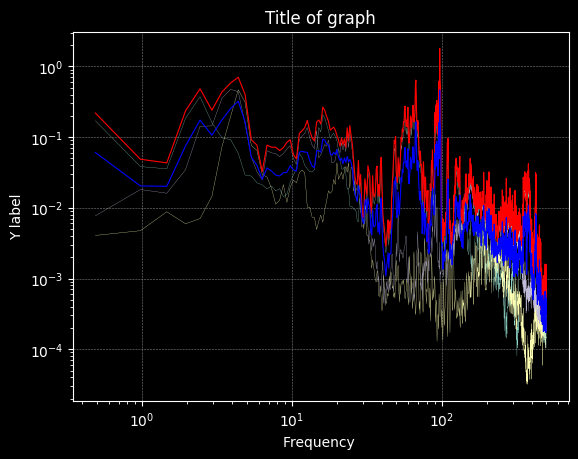

<Figure size 640x480 with 0 Axes>

In [45]:

plt.style.use('dark_background')
for i in df_master.columns:
    if 'Freq' not in i:
        x = df_master['Freq']
        y = df_master[i]
        plt.loglog(x, y, linewidth=0.2)

x = df_master['Freq']
y = upper_limit
plt.loglog(x, y, linewidth=0.8, color = "red")


x = df_master['Freq']
y = mean_lst
plt.loglog(x, y, linewidth=0.8, color = "blue")

# x = df['Freq']
# y = std_lst
# plt.loglog(x, y, linewidth=0.5, color = "black")

# x = df_master['Freq']
# y = lower_limit
# plt.loglog(x, y, linewidth=0.5,color = "green")


plt.xlabel("Frequency ")
plt.ylabel("Y label")
plt.title("Title of graph")
# plt.grid(True,which='both',linewidth=0.2,color = "gray")
plt.grid(linewidth=0.4,linestyle = '--',color = "gray")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('TESTING.png', dpi=2000)

In [46]:
df_master = df_master.reset_index(drop=True)
df_master.loc[len(df_master)] = ''

In [47]:
df_master['Freq'][0]

0.4882812

In [48]:
count = 0
for j in df_master.columns:
    if 'Freq' not in j:
        val_list = []
        val_list.append(0)
        for i in range(0,len(df_master)-2):
            if df_master['Freq'][i] < 200.0001:
                up_val1 = df_master.iloc[i][j]
                up_val2 = df_master.iloc[i+1][j]
                frq_val1 = df_master.iloc[i][0]
                frq_val2 = df_master.iloc[i+1][0]
                val_list.append(0.5*(up_val1+up_val2)/(frq_val1/frq_val2))
            else:
                break
        
        col_name = 'Val_'+str(count)
        count = count + 1
        sum_val = sum(val_list)
        sqrt_val = math.sqrt(sum(val_list))
        val_list.append(sum_val)
        val_list.append(sqrt_val)
        df_master.loc[:,col_name]= pd.Series(val_list)
#         df_master[col_name] = pd.Series(val_list)

In [49]:
mean_lst.append('')
upper_limit.append('')
df_master['average'] = mean_lst
df_master['upper'] = upper_limit

In [50]:
df_master.to_excel('master_df.xlsx',index=False)
df_master.to_csv('master_df.csv',index=False)

In [51]:
df_master

,Freq,CH3_Upper_Envelope_0,CH3_Upper_Envelope_1,CH3_Upper_Envelope_2,Val_0,Val_1,Val_2,average,upper
0,0.488281,0.170197,0.004066,0.007698,0.000000,0.000000,0.000000,0.060654,0.219111
1,0.976562,0.038296,0.004746,0.018124,0.208494,0.008813,0.025822,0.020389,0.048594
2,1.464844,0.035549,0.008788,0.016082,0.055384,0.010150,0.025655,0.02014,0.043243
3,1.953125,0.184195,0.005948,0.034534,0.146496,0.009824,0.033744,0.074893,0.234765
4,2.441406,0.372744,0.007032,0.141986,0.348087,0.008113,0.110325,0.173921,0.482763
...,...,...,...,...,...,...,...,...,...
1019,498.0468,0.000138,0.001254,0.000181,NaN,NaN,NaN,0.000524,0.00158
1020,498.5351,0.00015,0.001143,0.000216,NaN,NaN,NaN,0.000503,0.001431
1021,499.0234,0.000144,0.000977,0.000335,NaN,NaN,NaN,0.000485,0.001214
1022,499.5117,0.00022,0.000441,0.000288,NaN,NaN,NaN,0.000317,0.000506
